In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [3]:
CLASS_NAMES= ['healthy', 'mild', 'moderate', 'severe']
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3
NUM_CLASSES = len(CLASS_NAMES)

# **ResNET**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#load data
data_x = np.load('fractal_reshapeRecPlot_data_x_aumentated_normalized.npy') #images
data_y = np.load('fractal_reshapeRecPlot_data_y_aumentated_normalized.npy') #labels
TOTAL_IMAGES = len(data_y)
print("TOTAL_IMAGES = ", TOTAL_IMAGES)

TOTAL_IMAGES =  1184


In [6]:
VALIDATION_PERCENTAGE = 0.1

In [7]:
validation_size = int(VALIDATION_PERCENTAGE * TOTAL_IMAGES)

validation_x = data_x[:validation_size] #taking validation images from original data
validation_y = data_y[:validation_size]
data_x = data_x[validation_size:] #removing validation images from original data
data_y = data_y[validation_size:]

# **Splitting data in train - validation - test**

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [10]:
import tensorflow.keras.backend as K
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB1
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.applications import EfficientNetB4
# from tensorflow.keras.applications import EfficientNetB5
# from tensorflow.keras.applications import EfficientNetB6
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import *

In [12]:
adam = tf.keras.optimizers.Adam(lr=0.001)

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
def define_model():
    K.set_image_data_format('channels_last')
    K.set_learning_phase(1)
    model = tf.keras.applications.MobileNet(
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        input_shape=(IMG_HEIGHT,IMG_WIDTH, CHANNELS),
        pooling=None,
        classes=NUM_CLASSES,
        # classifier_activation="softmax",
        # **kwargs
    )
    new_model = models.Sequential()
    new_model.add(model)
    #3rd conv layer
    new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2))
    #4th conv layer
    new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2))
    #Flatten Layer
    new_model.add(tf.keras.layers.Flatten())

    new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #new_model.add(tf.keras.layers.l2( l=0.01))
    #new_model.add(layers.GlobalAveragePooling2D())
    #output Dense Layer
    new_model.add(tf.keras.layers.Dense(NUM_CLASSES))
    new_model.add(tf.keras.layers.Activation('softmax'))
    return new_model

In [14]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
cvscores = []
epochs = 100
num_classes = 2
num_kfold=1
all_models = []

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
27/27 - 10s - loss: 1.6829 - accuracy: 0.6303 - val_loss: 2.2762 - val_accuracy: 0.3598 - 10s/epoch - 359ms/step
Epoch 2/100
27/27 - 3s - loss: 1.1538 - accuracy: 0.8439 - val_loss: 2.1310 - val_accuracy: 0.4533 - 3s/epoch - 111ms/step
Epoch 3/100
27/27 - 3s - loss: 0.9147 - accuracy: 0.9155 - val_loss: 2.4281 - val_accuracy: 0.4720 - 3s/epoch - 110ms/step
Epoch 4/100
27/27 - 3s - loss: 0.8008 - accuracy: 0.9296 - val_loss: 2.5848 - val_accuracy: 0.4579 - 3s/epoch - 111ms/step
Epoch 5/100
27/27 - 3s - loss: 0.7257 - accuracy: 0.9261 - val_loss: 2.1244 - val_accuracy: 0.5794 - 3s/epoch - 112ms/step
Epoch 6/100
27/27 - 3s - loss: 0.6165 - accuracy: 0.9437 - val_loss: 1.6517 - val_accuracy: 0.6682 - 3s/epoch - 112ms/step
Epoch 7/100
27/27 - 3s - loss: 0.4921 - accuracy: 0.9613 - val_loss: 0.6717 - val_accuracy: 0.8972 - 3s/epoch - 112ms/step
Epoch 8/100
27/27 - 3s - loss: 0.4953 - accuracy: 0.9390 - val_loss: 0.7119 - val_accuracy: 0.8598 - 3s/epoch - 111ms/step
Epoch 9/100
27

Epoch 67/100
27/27 - 3s - loss: 7.9356e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000 - 3s/epoch - 113ms/step
Epoch 68/100
27/27 - 3s - loss: 7.8479e-04 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000 - 3s/epoch - 112ms/step
Epoch 69/100
27/27 - 3s - loss: 7.5309e-04 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000 - 3s/epoch - 113ms/step
Epoch 70/100
27/27 - 3s - loss: 7.3451e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000 - 3s/epoch - 113ms/step
Epoch 71/100
27/27 - 3s - loss: 7.5571e-04 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9953 - 3s/epoch - 113ms/step
Epoch 72/100
27/27 - 3s - loss: 7.1785e-04 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9953 - 3s/epoch - 112ms/step
Epoch 73/100
27/27 - 3s - loss: 6.8785e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9953 - 3s/epoch - 112ms/step
Epoch 74/100
27/27 - 3s - loss: 6.7931e-04 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 0.9953 

INFO:tensorflow:Assets written to: mobilenet_100epochs_fractal_augmented_kfold_1.npy\assets


INFO:tensorflow:Assets written to: mobilenet_100epochs_fractal_augmented_kfold_1.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
27/27 - 7s - loss: 1.9965 - accuracy: 0.4701 - val_loss: 14.6421 - val_accuracy: 0.2629 - 7s/epoch - 249ms/step
Epoch 2/100
27/27 - 3s - loss: 1.1585 - accuracy: 0.7386 - val_loss: 11.9938 - val_accuracy: 0.2723 - 3s/epoch - 112ms/step
Epoch 3/100
27/27 - 3s - loss: 0.6630 - accuracy: 0.8769 - val_loss: 2.5694 - val_accuracy: 0.2817 - 3s/epoch - 112ms/step
Epoch 4/100
27/27 - 3s - loss: 0.5834 - accuracy: 0.8757 - val_loss: 2.7767 - val_accuracy: 0.3192 - 3s/epoch - 112ms/step
Epoch 5/100
27/27 - 3s - loss: 0.4505 - accuracy: 0.8933 - val_loss: 1.5912 - val_accuracy: 0.4930 - 3s/epoch - 112ms/step
Epoch 6/100
27/27 - 3s - loss: 0.3832 - accuracy: 0.9109 - val_loss: 1.8871 - val_accuracy: 0.5446 - 3s/epoch - 112ms/step
Epoch 7/100
27/27 - 3s - loss: 0.2584 - accuracy: 0.9449 - val_loss: 2.2352 - val_accuracy: 0.4554 - 3s/epoch - 112ms/step
Epoch 8/100
27/27 - 3s - loss: 0.2699 - accuracy: 0.9390 - val_loss: 0.7607 - val_accuracy: 0.7887 - 3s/epoch - 112ms/step
Epoch 9/100
27

Epoch 67/100
27/27 - 3s - loss: 9.1498e-04 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 0.9953 - 3s/epoch - 112ms/step
Epoch 68/100
27/27 - 3s - loss: 9.2179e-04 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9953 - 3s/epoch - 112ms/step
Epoch 69/100
27/27 - 3s - loss: 9.4803e-04 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0.9953 - 3s/epoch - 112ms/step
Epoch 70/100
27/27 - 3s - loss: 8.5690e-04 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0.9953 - 3s/epoch - 113ms/step
Epoch 71/100
27/27 - 3s - loss: 8.6865e-04 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 0.9953 - 3s/epoch - 112ms/step
Epoch 72/100
27/27 - 3s - loss: 7.9301e-04 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9953 - 3s/epoch - 113ms/step
Epoch 73/100
27/27 - 3s - loss: 8.4092e-04 - accuracy: 1.0000 - val_loss: 0.0261 - val_accuracy: 0.9953 - 3s/epoch - 113ms/step
Epoch 74/100
27/27 - 3s - loss: 8.0935e-04 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9953 

INFO:tensorflow:Assets written to: mobilenet_100epochs_fractal_augmented_kfold_2.npy\assets


INFO:tensorflow:Assets written to: mobilenet_100epochs_fractal_augmented_kfold_2.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
27/27 - 6s - loss: 1.8456 - accuracy: 0.5029 - val_loss: 12.0418 - val_accuracy: 0.2347 - 6s/epoch - 223ms/step
Epoch 2/100
27/27 - 3s - loss: 0.9522 - accuracy: 0.7808 - val_loss: 11.2423 - val_accuracy: 0.2488 - 3s/epoch - 111ms/step
Epoch 3/100
27/27 - 3s - loss: 0.8079 - accuracy: 0.8347 - val_loss: 6.8680 - val_accuracy: 0.2488 - 3s/epoch - 111ms/step
Epoch 4/100
27/27 - 3s - loss: 0.5602 - accuracy: 0.8828 - val_loss: 7.8631 - val_accuracy: 0.3521 - 3s/epoch - 111ms/step
Epoch 5/100
27/27 - 3s - loss: 0.4016 - accuracy: 0.9004 - val_loss: 7.3016 - val_accuracy: 0.4648 - 3s/epoch - 111ms/step
Epoch 6/100
27/27 - 3s - loss: 0.3209 - accuracy: 0.9297 - val_loss: 5.7872 - val_accuracy: 0.3897 - 3s/epoch - 111ms/step
Epoch 7/100
27/27 - 3s - loss: 0.2262 - accuracy: 0.9578 - val_loss: 6.9577 - val_accuracy: 0.3052 - 3s/epoch - 111ms/step
Epoch 8/100
27/27 - 3s - loss: 0.1887 - accuracy: 0.9555 - val_loss: 2.6449 - val_accuracy: 0.5869 - 3s/epoch - 111ms/step
Epoch 9/100
27

Epoch 67/100
27/27 - 3s - loss: 8.1673e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000 - 3s/epoch - 113ms/step
Epoch 68/100
27/27 - 3s - loss: 8.3512e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000 - 3s/epoch - 112ms/step
Epoch 69/100
27/27 - 3s - loss: 8.4850e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000 - 3s/epoch - 113ms/step
Epoch 70/100
27/27 - 3s - loss: 8.1787e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000 - 3s/epoch - 112ms/step
Epoch 71/100
27/27 - 3s - loss: 8.2027e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000 - 3s/epoch - 112ms/step
Epoch 72/100
27/27 - 3s - loss: 7.6945e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000 - 3s/epoch - 113ms/step
Epoch 73/100
27/27 - 3s - loss: 8.1425e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000 - 3s/epoch - 112ms/step
Epoch 74/100
27/27 - 3s - loss: 7.3261e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000 

INFO:tensorflow:Assets written to: mobilenet_100epochs_fractal_augmented_kfold_3.npy\assets


INFO:tensorflow:Assets written to: mobilenet_100epochs_fractal_augmented_kfold_3.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
27/27 - 6s - loss: 1.7383 - accuracy: 0.5873 - val_loss: 2.8204 - val_accuracy: 0.3615 - 6s/epoch - 233ms/step
Epoch 2/100
27/27 - 3s - loss: 0.9741 - accuracy: 0.7866 - val_loss: 4.8045 - val_accuracy: 0.3709 - 3s/epoch - 116ms/step
Epoch 3/100
27/27 - 3s - loss: 0.7277 - accuracy: 0.8593 - val_loss: 14.6669 - val_accuracy: 0.2300 - 3s/epoch - 119ms/step
Epoch 4/100
27/27 - 3s - loss: 0.4305 - accuracy: 0.9355 - val_loss: 6.9043 - val_accuracy: 0.2300 - 3s/epoch - 114ms/step
Epoch 5/100
27/27 - 3s - loss: 0.3224 - accuracy: 0.9461 - val_loss: 6.3949 - val_accuracy: 0.2488 - 3s/epoch - 115ms/step
Epoch 6/100
27/27 - 3s - loss: 0.2808 - accuracy: 0.9449 - val_loss: 5.8455 - val_accuracy: 0.2629 - 3s/epoch - 116ms/step
Epoch 7/100
27/27 - 3s - loss: 0.1978 - accuracy: 0.9555 - val_loss: 3.1240 - val_accuracy: 0.3897 - 3s/epoch - 113ms/step
Epoch 8/100
27/27 - 3s - loss: 0.1441 - accuracy: 0.9801 - val_loss: 0.5146 - val_accuracy: 0.8404 - 3s/epoch - 112ms/step
Epoch 9/100
27/

Epoch 67/100
27/27 - 3s - loss: 8.3975e-04 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9953 - 3s/epoch - 118ms/step
Epoch 68/100
27/27 - 3s - loss: 8.1980e-04 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 0.9953 - 3s/epoch - 116ms/step
Epoch 69/100
27/27 - 3s - loss: 8.1016e-04 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 0.9953 - 3s/epoch - 117ms/step
Epoch 70/100
27/27 - 3s - loss: 8.0562e-04 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9953 - 3s/epoch - 115ms/step
Epoch 71/100
27/27 - 3s - loss: 8.1958e-04 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 0.9953 - 3s/epoch - 116ms/step
Epoch 72/100
27/27 - 3s - loss: 7.8475e-04 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 0.9953 - 3s/epoch - 113ms/step
Epoch 73/100
27/27 - 3s - loss: 7.6998e-04 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 0.9953 - 3s/epoch - 115ms/step
Epoch 74/100
27/27 - 3s - loss: 7.5398e-04 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9953 

INFO:tensorflow:Assets written to: mobilenet_100epochs_fractal_augmented_kfold_4.npy\assets


INFO:tensorflow:Assets written to: mobilenet_100epochs_fractal_augmented_kfold_4.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
27/27 - 7s - loss: 1.8279 - accuracy: 0.5275 - val_loss: 10.1441 - val_accuracy: 0.2817 - 7s/epoch - 242ms/step
Epoch 2/100
27/27 - 3s - loss: 0.9773 - accuracy: 0.7995 - val_loss: 15.2712 - val_accuracy: 0.2817 - 3s/epoch - 112ms/step
Epoch 3/100
27/27 - 3s - loss: 0.6681 - accuracy: 0.8593 - val_loss: 10.9057 - val_accuracy: 0.2817 - 3s/epoch - 112ms/step
Epoch 4/100
27/27 - 3s - loss: 0.4299 - accuracy: 0.9379 - val_loss: 8.5086 - val_accuracy: 0.2817 - 3s/epoch - 113ms/step
Epoch 5/100
27/27 - 3s - loss: 0.3321 - accuracy: 0.9355 - val_loss: 4.9408 - val_accuracy: 0.5117 - 3s/epoch - 111ms/step
Epoch 6/100
27/27 - 3s - loss: 0.2929 - accuracy: 0.9355 - val_loss: 0.6011 - val_accuracy: 0.8404 - 3s/epoch - 111ms/step
Epoch 7/100
27/27 - 3s - loss: 0.2547 - accuracy: 0.9461 - val_loss: 5.1036 - val_accuracy: 0.3615 - 3s/epoch - 112ms/step
Epoch 8/100
27/27 - 3s - loss: 0.3478 - accuracy: 0.9062 - val_loss: 4.6565 - val_accuracy: 0.3286 - 3s/epoch - 113ms/step
Epoch 9/100
2

Epoch 67/100
27/27 - 3s - loss: 7.2712e-04 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000 - 3s/epoch - 120ms/step
Epoch 68/100
27/27 - 3s - loss: 7.1940e-04 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9953 - 3s/epoch - 118ms/step
Epoch 69/100
27/27 - 3s - loss: 7.2552e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 0.9953 - 3s/epoch - 117ms/step
Epoch 70/100
27/27 - 3s - loss: 7.0844e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9953 - 3s/epoch - 114ms/step
Epoch 71/100
27/27 - 3s - loss: 7.4656e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9953 - 3s/epoch - 113ms/step
Epoch 72/100
27/27 - 3s - loss: 7.0484e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9953 - 3s/epoch - 114ms/step
Epoch 73/100
27/27 - 3s - loss: 6.7277e-04 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 0.9953 - 3s/epoch - 115ms/step
Epoch 74/100
27/27 - 3s - loss: 7.0073e-04 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9953 

INFO:tensorflow:Assets written to: mobilenet_100epochs_fractal_augmented_kfold_5.npy\assets


INFO:tensorflow:Assets written to: mobilenet_100epochs_fractal_augmented_kfold_5.npy\assets


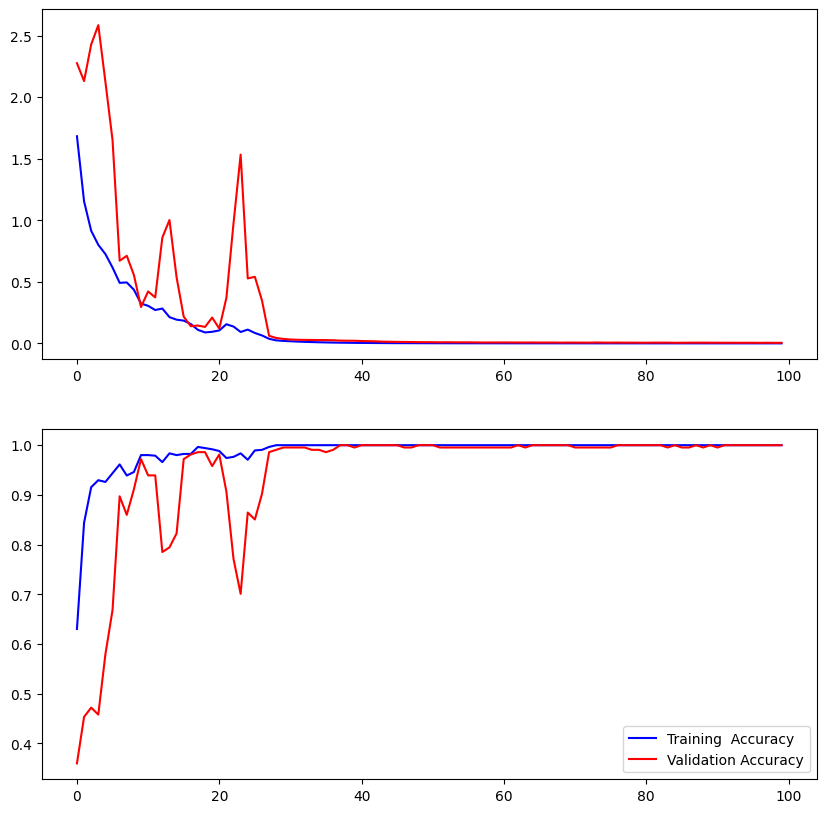

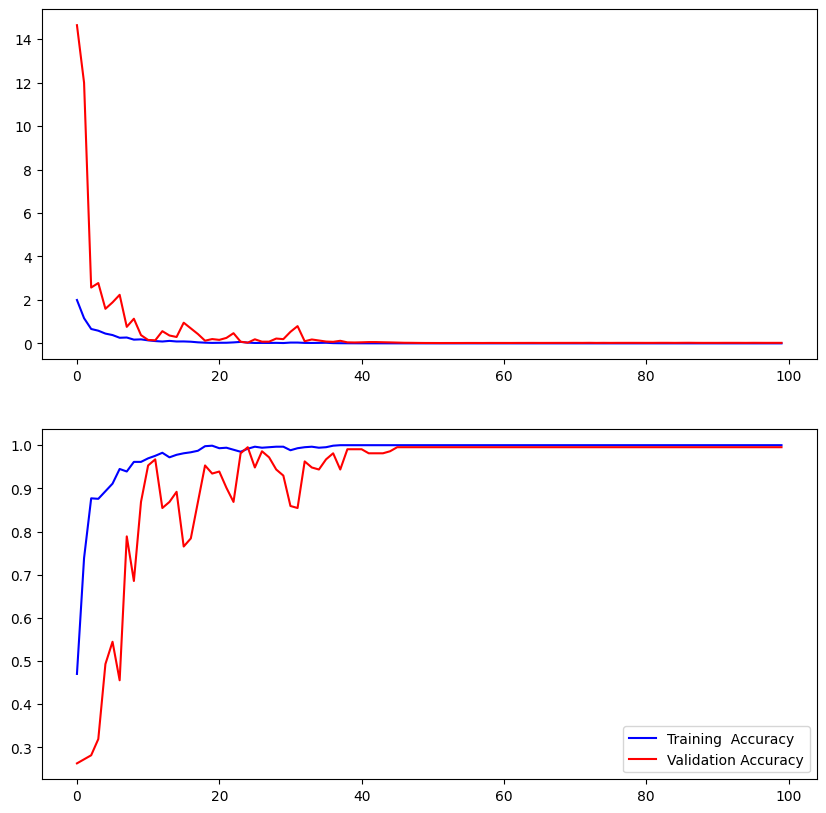

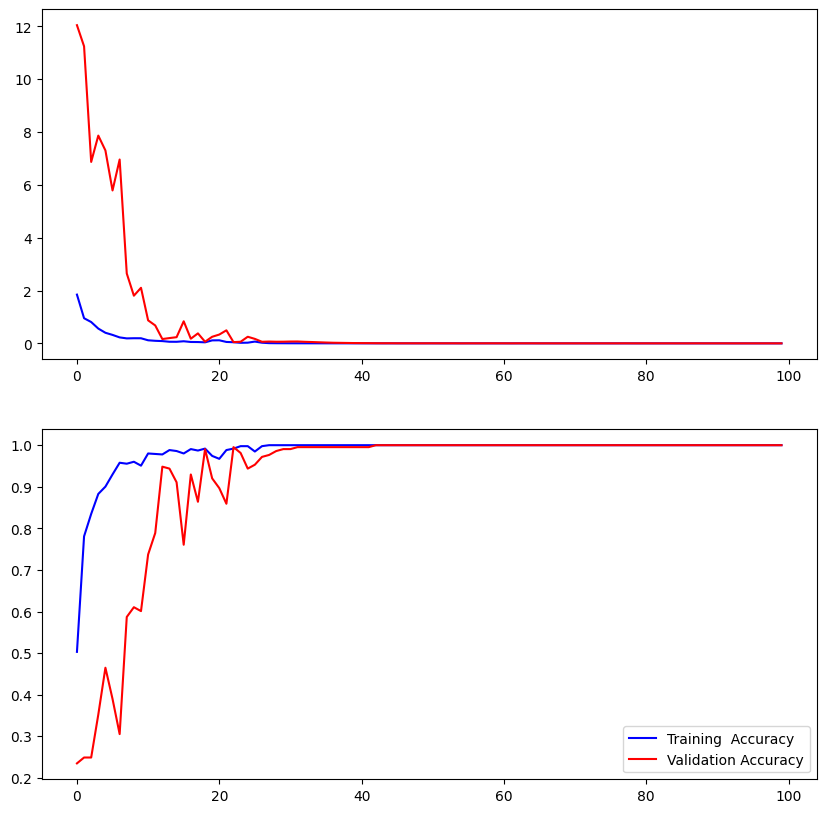

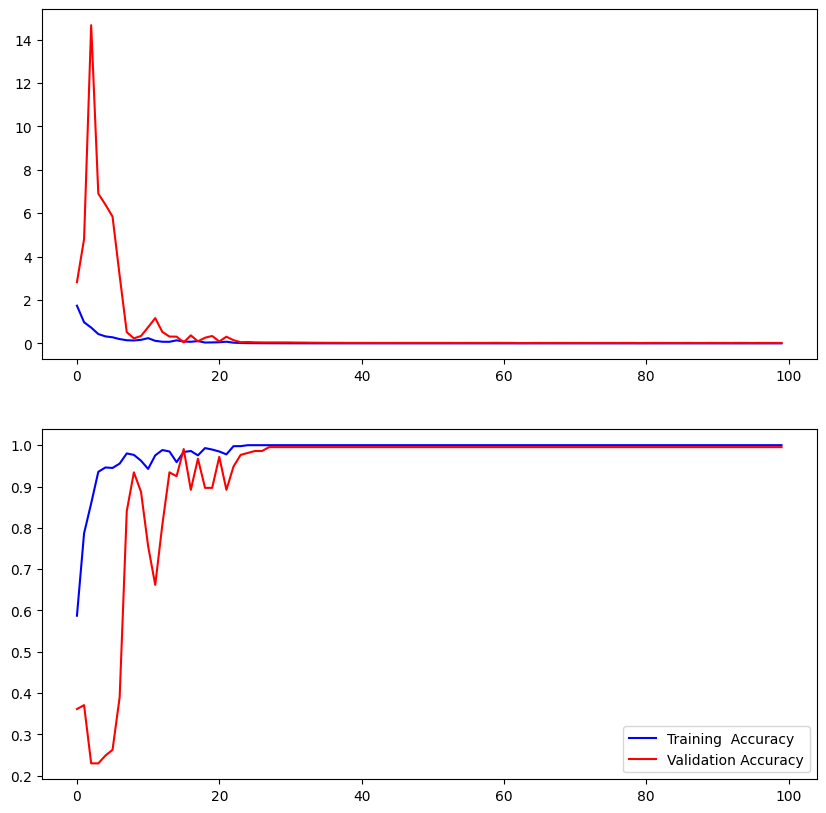

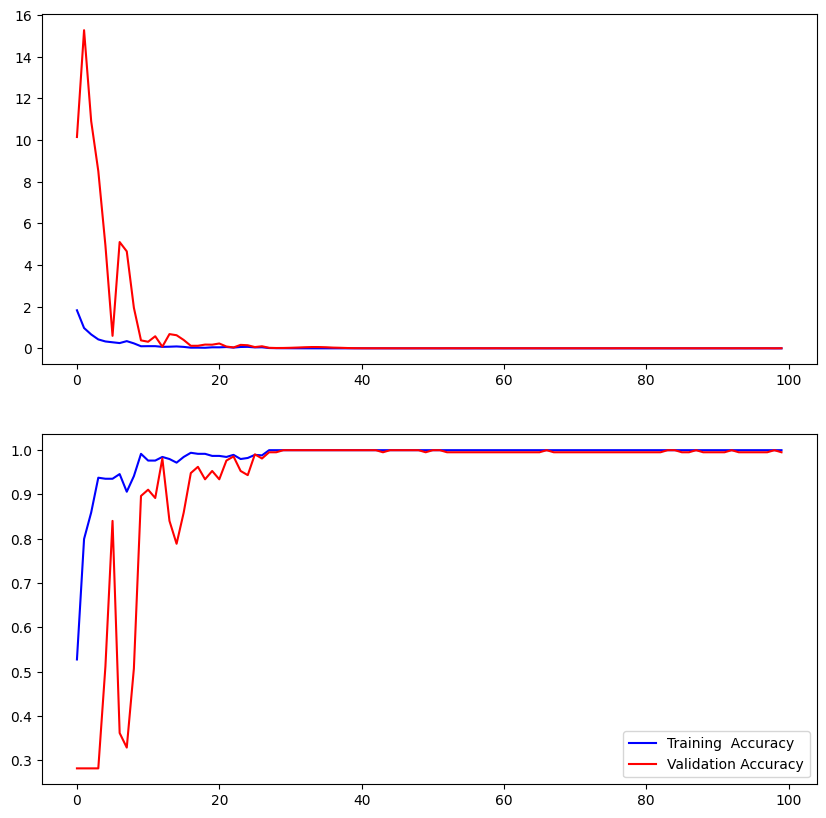

In [15]:
for train, test in kfold.split (data_x, data_y):
    new_model = define_model()

    new_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
    history = new_model.fit(data_x[train], data_y[train],
                                epochs=epochs,verbose=2,validation_data=(data_x[test], data_y[test]), shuffle=False)

    new_model.history.history.keys()
    f,ax=plt.subplots(2,1,figsize=(10,10)) 

    #Assigning the first subplot to graph training loss and validation loss
    ax[0].plot(new_model.history.history['loss'],color='b',label='Training Loss')
    ax[0].plot(new_model.history.history['val_loss'],color='r',label='Validation Loss')

    #Plotting the training accuracy and validation accuracy
    ax[1].plot(new_model.history.history['accuracy'],color='b',label='Training  Accuracy')
    ax[1].plot(new_model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

    plt.legend()
    print('Accuracy Score = ',np.max(history.history['val_accuracy']))

    scores = new_model.evaluate(validation_x,validation_y,verbose=0)
    print("%s: %.2f%%" %(new_model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1]*100)
    
    new_model.save(f'mobilenet_100epochs_fractal_augmented_kfold_{str(num_kfold)}.npy')
    all_models.append(new_model)
    num_kfold = num_kfold + 1

In [16]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores),np.std(cvscores)))

99.49% (+/- 0.68%)


**Random forest - flatting**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
cvscores_rf = []
for new_model in all_models:
    new_model_rf = keras.Model(inputs=new_model.input, outputs=new_model.get_layer(index=9).output)
    featureVector = new_model_rf.predict(data_x)
    featureVector2 = new_model_rf.predict(validation_x)
    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(featureVector,data_y)
    y_pred=clf.predict(featureVector2)
    score = metrics.accuracy_score(validation_y, y_pred)
    cvscores_rf.append(score)
    print("Accuracy:",score)

4/4 [==============================] - 0s 30ms/step
Accuracy: 1.0
4/4 [==============================] - 0s 30ms/step
Accuracy: 0.9830508474576272
4/4 [==============================] - 0s 30ms/step
Accuracy: 1.0
4/4 [==============================] - 0s 28ms/step
Accuracy: 0.9830508474576272
4/4 [==============================] - 0s 33ms/step
Accuracy: 1.0


In [18]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores_rf),np.std(cvscores_rf)))

0.99% (+/- 0.01%)


# **Testes**

In [19]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda no treino')
plt.plot(epochs, val_loss, 'g', label='Perda na validação')
plt.title('Perda na validação e treino')
plt.legend()
plt.show()

NameError: name 'model_trained' is not defined

In [ ]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_y, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

In [ ]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
cm = confusion_matrix(test_y, pred_probs)

In [ ]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_y, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)